In [1]:
from re import U
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic # for printing/debugging
import pandas as pd

import patchify as pat
from pathlib import Path

# import custom modules
import NavigatingTheMatrix as nvm
import As_detection as asd

In [32]:
# load desired matrix file and make an STM object from NavigatingTheMatrix file
cwd = Path.cwd() # current working directory

path = cwd / 'examples' / '20181123-122007_STM_AtomManipulation-Earls Court-Si(100)-H term--26_1.Z_mtrx'

scan = nvm.STM( str(path) , None, None, None, standard_pix_ratio=512/100)
    

Pixel to nm ratio is twice as large as desired  trace up fwd . Pixels will be halved so that feature detection can be carried out on surface.
Pixel to nm ratio is twice as large as desired  retrace up . Pixels will be halved so that feature detection can be carried out on surface.
Pixel to nm ratio is twice as large as desired  trace down . Pixels will be halved so that feature detection can be carried out on surface.
Pixel to nm ratio is twice as large as desired  retrace down . Pixels will be halved so that feature detection can be carried out on surface.


In [33]:
# clean up the scans

scan.clean_up(scan.trace_up, 'trace up', plane_level=True)
scan.clean_up(scan.retrace_up, 'retrace up', plane_level=True)

scan.clean_up(scan.trace_down, 'trace down', plane_level=True)
scan.clean_up(scan.retrace_down, 'retrace down', plane_level=True)

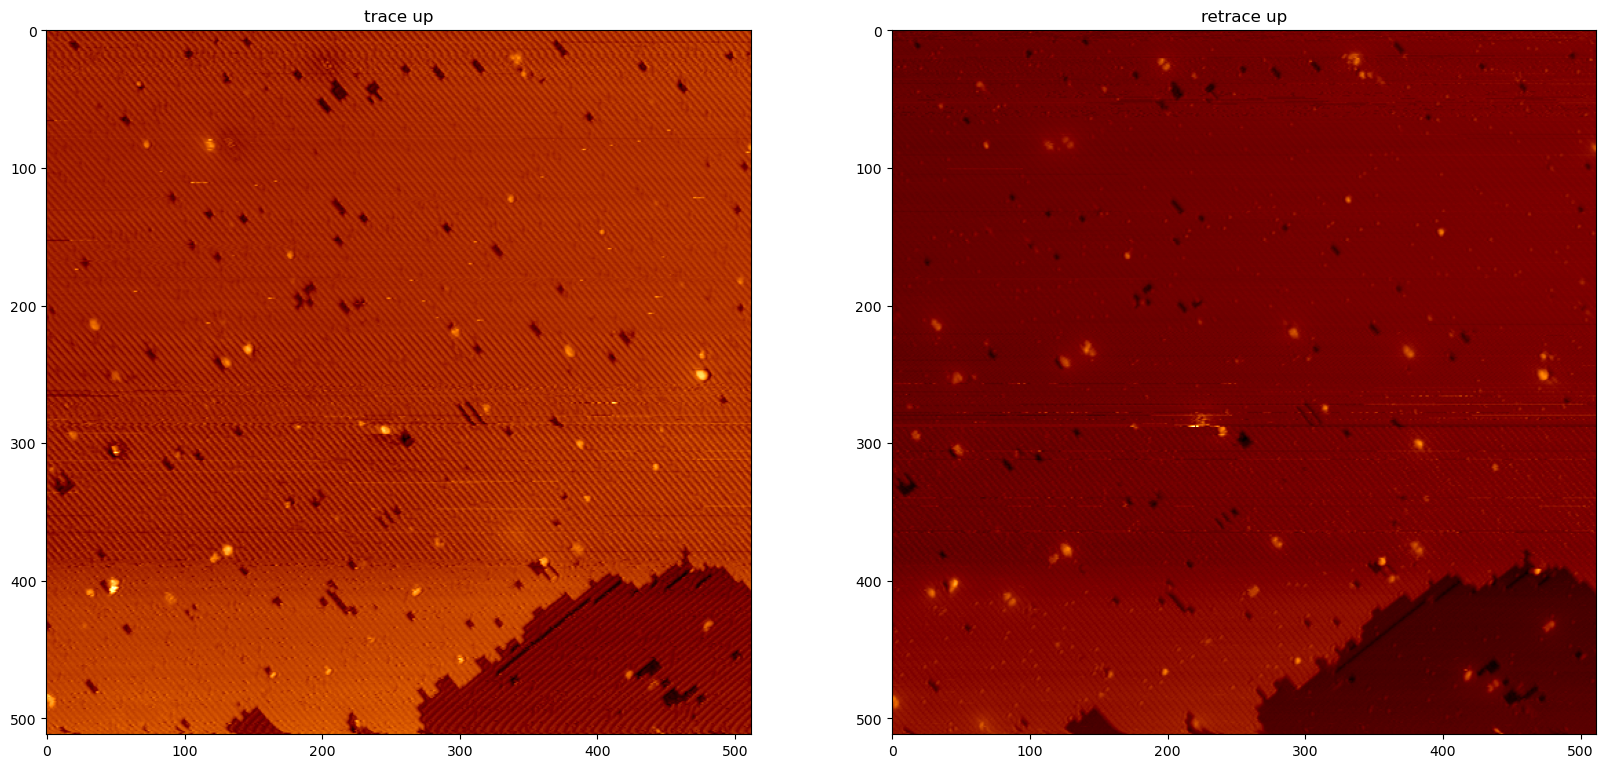

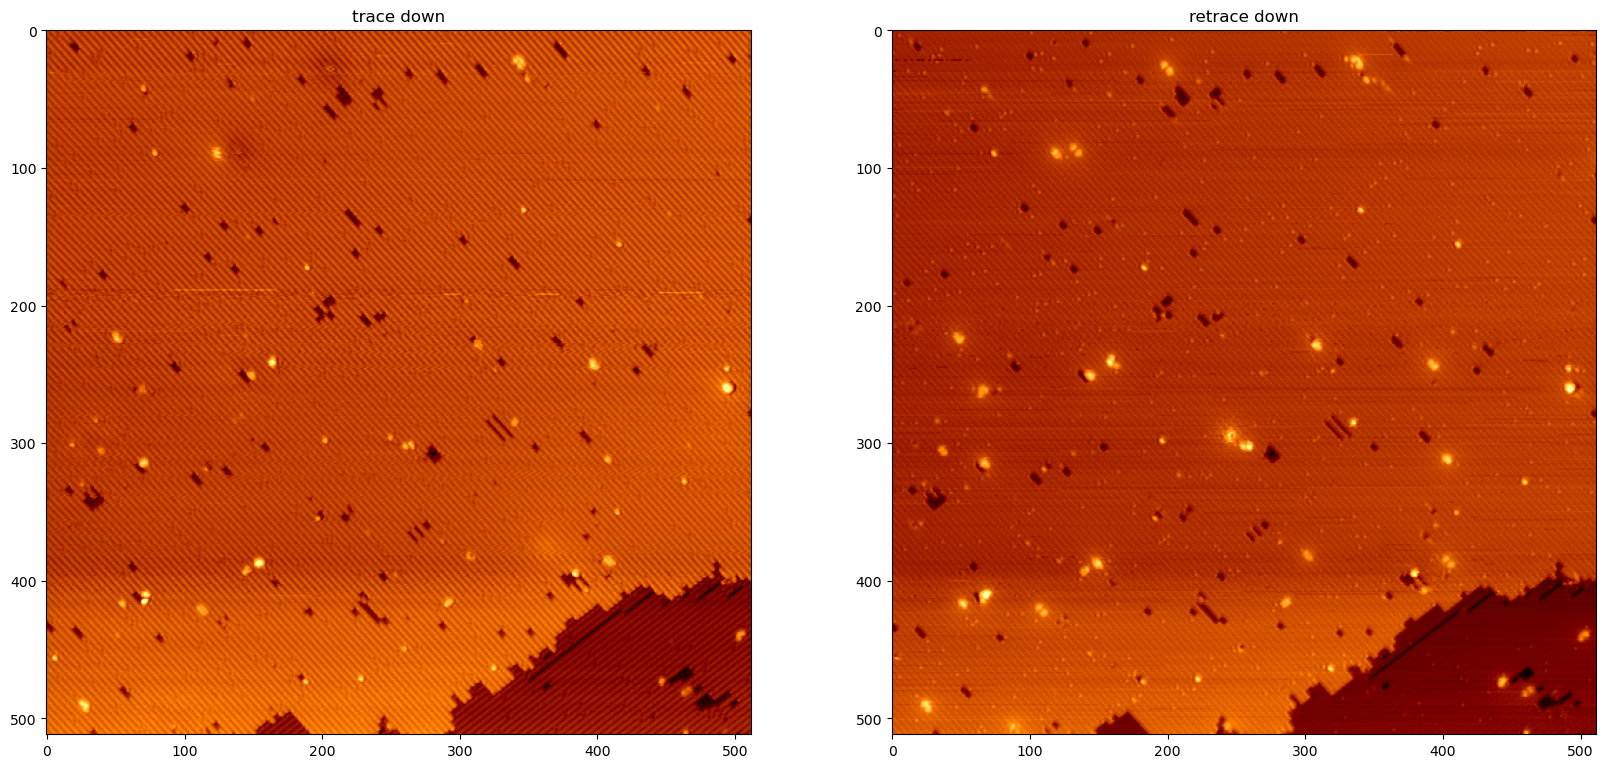

In [34]:
# plot the cleaned up scans and choose whether to use trace up or down
# (Viewing with gwyddion provides better quality images for inspection)

fig, ax = plt.subplots(1,2, figsize=(20,15))
ax[0].imshow(scan.trace_up_proc, cmap='afmhot')
ax[0].set_title('trace up')
ax[1].imshow(scan.retrace_up_proc, cmap='afmhot')
ax[1].set_title('retrace up')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(20,15))
ax[0].imshow(scan.trace_down_proc, cmap='afmhot')
ax[0].set_title('trace down')
ax[1].imshow(scan.retrace_down_proc, cmap='afmhot')
ax[1].set_title('retrace down')
plt.show()

In [35]:
# correct hysteresis
scan.trace_up_proc, scan.retrace_up_proc, corrected = scan.correct_hysteresis(scan.trace_up_proc, scan.retrace_up_proc, 'trace up')   
scan.trace_down_proc, scan.retrace_down_proc, corrected = scan.correct_hysteresis(scan.trace_down_proc, scan.retrace_down_proc, 'trace down')
   

Number of matches found for hysteresis correction: 17 . If it's only a few (less than ~3) the correction will not be very accurate.
Number of matches found for hysteresis correction: 44 . If it's only a few (less than ~3) the correction will not be very accurate.


In [36]:
# make a Si_scan object just for trace down
trace_up = asd.Si_Scan(scan, 'trace up', As=True) # As = False if not dosed yet
trace_down = asd.Si_Scan(scan, 'trace down', As=True)

Resolution of image is 512
Resolution of image is 512


In [37]:
# make detector object to find and label defects
detector = asd.Detector()

In [44]:
# run prediction
trace_down.one_hot_segmented = detector.predict(trace_down, As = True)

# turn output into rgb image
trace_down.rgb = detector.turn_rgb(trace_down.one_hot_segmented)

Number of features is 55


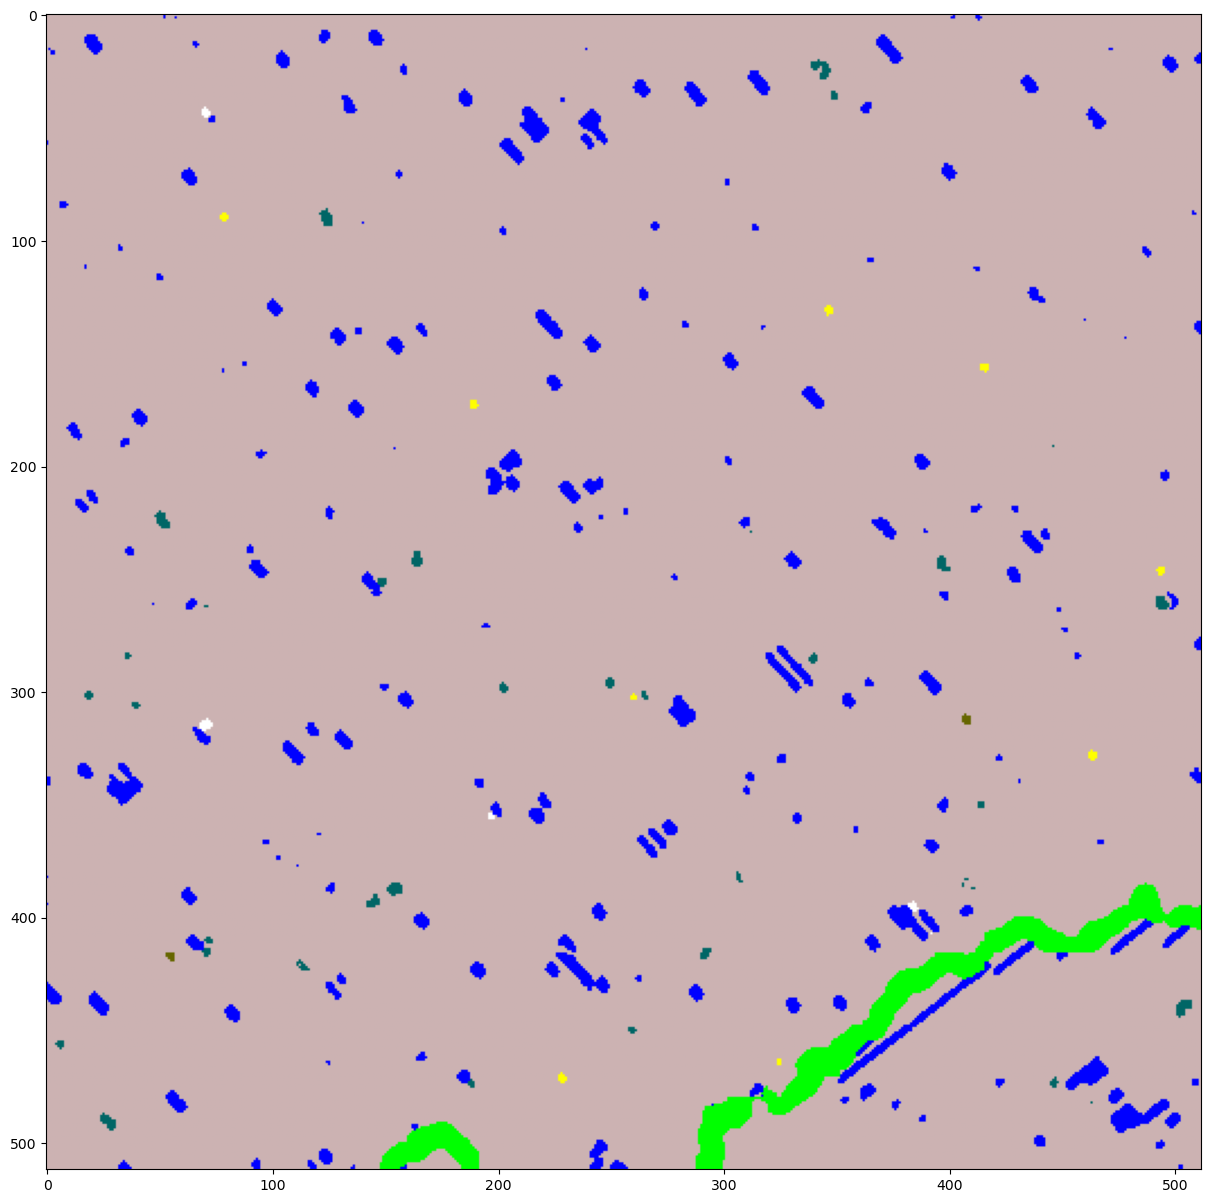

In [47]:
# show image
plt.figure(figsize=(15,15))
plt.imshow(trace_down.rgb)
plt.show()

In [48]:
# find distance between all features then use this to filter for whatever features you want
trace_down.feature_dists()

# all distances are now save in a dictionary which can be accessed by trace_down.features
# keys are the different features in the scan (NOT the feature type). The features are numbered in the order they were found (so keys are 0, 1, 2, 3, etc.)
# values are feature objects (see As_detection.py for more info). Each feature object has things like feature.coord, feature.feature_type
for key in trace_down.features.keys():
    #print('key:', key)
    print('coord: {}, feature type: {}'.format(trace_down.features[key].coord, trace_down.features[key].feature_type))



coord: [313 408], feature type: oneDB
coord: [418  55], feature type: oneDB
coord: [ 23 342], feature type: anomalies
coord: [ 37 350], feature type: anomalies
coord: [ 93 125], feature type: anomalies
coord: [192 447], feature type: anomalies
coord: [226  52], feature type: anomalies
coord: [230 313], feature type: anomalies
coord: [242 165], feature type: anomalies
coord: [245 398], feature type: anomalies
coord: [252 150], feature type: anomalies
coord: [262 495], feature type: anomalies
coord: [262  70], feature type: anomalies
coord: [285  37], feature type: anomalies
coord: [287 340], feature type: anomalies
coord: [297 250], feature type: anomalies
coord: [299 203], feature type: anomalies
coord: [303  20], feature type: anomalies
coord: [302 265], feature type: anomalies
coord: [307  40], feature type: anomalies
coord: [352 415], feature type: anomalies
coord: [384 308], feature type: anomalies
coord: [386 407], feature type: anomalies
coord: [388 156], feature type: anomalies


In [ ]:
# turn the above information into an easier to understand pandas dataframe
features_df = pd.DataFrame(columns=['feature type', 'coord'])
for key in trace_down.features.keys():
    features_df = features_df.append({'feature type': trace_down.features[key].feature_type, 'coord': trace_down.features[key].coord}, ignore_index=True)


In [12]:
features_df

,feature type,coord
0,oneDB,"[313, 408]"
1,oneDB,"[418, 55]"
2,anomalies,"[23, 342]"
3,anomalies,"[37, 350]"
4,anomalies,"[93, 125]"
5,anomalies,"[192, 447]"
6,anomalies,"[226, 52]"
7,anomalies,"[230, 313]"
8,anomalies,"[242, 165]"
9,anomalies,"[245, 398]"


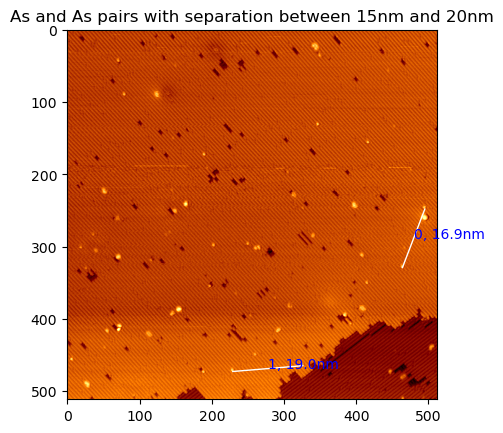

ic| As_to_As: {0: [<As_detection.Feature object at 0x0000019F02AA5DE0>,
               1: [<As_detection.Feature object at 0x0000019F02AA4CD0>,
                   <As_detection.Feature object at 0x0000019F02AA70D0>]}


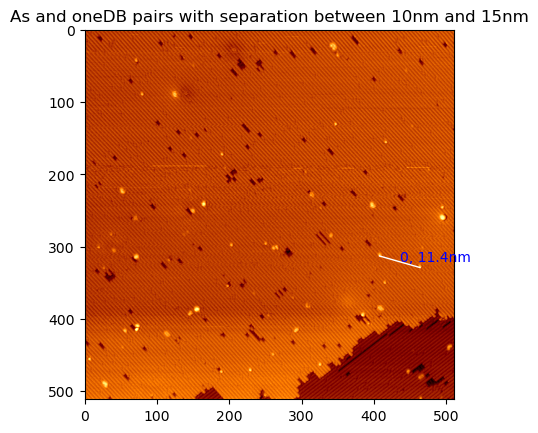

ic| As_to_db: {0: [<As_detection.Feature object at 0x0000019F02AA4C70>,
                   <As_detection.Feature object at 0x0000019F00F84EB0>]}


{0: [<As_detection.Feature at 0x19f02aa4c70>,
  <As_detection.Feature at 0x19f00f84eb0>]}

In [49]:
# find all As dopnats that are at a distance of 15nm-20nm from each other
As_to_As = trace_down.find_pairs('As', 'As', max_dist = 20, min_dist = 15)
ic(As_to_As) # print results too

# find all As dopnats that are at a distance of 10nm-15nm from a single db
As_to_db = trace_down.find_pairs('As', 'oneDB', max_dist = 15, min_dist = 10)
ic(As_to_db) # print results too